# 数据科学之分进合击进阶分析策略

*  本周主要内容：数据重塑（Reshape）与数据透视表（pivot, pivot_table）**系统**说明和实践
*  上周主要内容：(1)新增变量丶(2)重塑丶(3)聚合的**初步**介绍和实践
*  20春_Web数据分析_week05
*  电子讲义设计者：廖汉腾, 许智超


In [1]:
%%html
<style>
/* 本电子讲义使用之CSS */
div.code_cell {
    background-color: #e5f1fe;
}
div.cell.selected {
    background-color: #effee2;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 3.6rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 60%;
    height: auto;
    float: right;
}

.rendered_html img[src*="#full"], .rendered_html svg[src*="#full"] {
    max-width: 100%;
    height: auto;
    float: none;
}

.rendered_html img[src*="#thumbnail"], .rendered_html svg[src*="#thumbnail"] {
    max-width: 15%;
    height: auto;
}
.rendered_html img[src*="#thumbnailauto"], .rendered_html svg[src*="#thumbnail"] {
    max-width: auto;
    height: auto;
}

/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}
.bg-reshape {
    width: 550px;
    height: 205px;
    background: url('../20春_pandas_CheatSheet.svg') -205px -110px;
    float: left;
}
.break {
                   page-break-after: right; 
                   width:100%;
                   clear:both;
}
</style>

##  介绍

### 上周主要内容：
1. 新增变量
  * 用str字符串方法处理文本数据
2. 重塑
  * drop, split, stack
3. 聚合
  * merge


### 本电子讲义说明

本电子讲义为一系列课程的主要教材
*  课程：20春_数据分析pandas （中山大学南方学院）
*  设计者：廖汉腾, 许智超
* 参考来源: [官方英文新手教程](https://pandas.pydata.org/pandas-docs/version/1.0.2/getting_started/index.html#getting-started)

-----

课堂教学方式：
* 分段式以英文新手教程的内容做示范及说明
* 课堂上以实际中文数据做操练，每段约10-15分钟
* 抽学生联mic自播说明难点及成果点，教师总结

-----

课后实践方式：
* 学生fork教师提供的代码，做以下实践
* (必做)一项为此代码的实践，学生需要对ipynb文档中的说明(含markdown及图片)及代码进行演化改进，可以是注解说明，可以是调整参数实验，可以是额外方法实践，可以是以上的组合，学生
* (选做)一项为此代码的延伸实践，学生对ipynb文档中的一部分或全部进行演化，变成另一个独立项目，说好或做好一件事

In [2]:
import pandas as pd

## 本周内容纲要
<div class="bg-reshape"></div>

<div class="break"></div>
<div class="break"></div>


### 本周主要内容：

以***独角兽数据***案例进行数据框数据重塑与数据透视表**系统说明和实践**：
![](https://support.content.office.net/en-us/media/095beeee-8781-4b14-be42-9b05e9aff8d3.png#thumbnailauto)

1. 数据重塑（Reshape）：
  1. 对表格行进行排序（sort_values）
  2. 长到宽表格式（pivot）
2. 数据透视表（pivot, pivot_table）
  1. 对表格行进行排序（sort_values）
  2. 长到宽表格式（pivot）
3. 比较数据透视表（pivot, pivot_table）
  1. 和Excel相比
  2. 和gropby相比




-----


## 视觉化纲要

-----

### 知识点

![](https://pandas.pydata.org/pandas-docs/version/1.0.2/_images/reshaping_pivot.png)
本周知识点主要为**在二维项度**上，以"类别"分进，以"数量"合击，内容包括以下：

* 数据科学之分进合击**进阶**分析策略
  * 什麽是pivot, pivot_table, cross_tab数据透序表
  * 这为什麽对"出报表"很重要？
* **复习**分进合击操演的心法及剑法学习
  * 区分变量性质/数据型态 (variable types / data types)  
  * 分进多为"类别"，可以是定类或定序
  * 合击常为"数量"，可以是定距或定比
* 二维项度的设定决定及规划
  * 使用nunique预判生成较宽表格的大小
  * 多层次下的较复杂排序
  * 数据框之"长"vs."宽"的使用差异
-----

### 实践

以数个"类别"分进，再以"数量"合击初步实践2019胡润全球独角兽榜数据。本周实践内容共分5段：

1. 数据框出交叉报表
2. 数据框排序（sorted_values）
3. pivot说明
4. pivot_table说明
5. 数据感**进阶**：从聚合到解聚的操作感走向二维

<div class="emoticon">😃😄😁</div>

----- 

# 数据框出交叉报表

数据科学之分进合击进阶分析策略，在本周会靠数据重塑（Reshape）与数据透视表（pivot, pivot_table）更上一层楼

* [參考1](https://pandas.pydata.org/pandas-docs/version/1.0.2/getting_started/intro_tutorials/07_reshape_table_layout.html#min-tut-07-reshape)
* [參考2](https://pandas.pydata.org/pandas-docs/version/1.0.2/user_guide/reshaping.html#reshaping)


## 初阶A-0：分进合击

In [3]:
# A-0 採用初阶分进合击分析策略 groupby ... agg
df = pd.read_csv ("20春_pandas_week02_hurun_unicorn.tsv", encoding = "utf8", sep="\t")
# df.info() # 注意看Dtype! 
分进合击初阶 = df.groupby(by= ["国家", "成立年份"]) \
                .agg({"估值（亿人民币）":"sum"}) 
分进合击初阶

估值（亿人民币）
国家  成立年份          
中国  2000       170
    2001       170
    2002       200
    2003       200
    2004       100
...            ...
韩国  2005        70
    2007       350
    2010       670
    2011       270
马耳他 2017       150

[100 rows x 1 columns]

注意上表是有100列，1行数据

若想要把成立年份变量往行变量放呢？

## 迸阶A-1：分进合击pivot

![](https://pandas.pydata.org/pandas-docs/version/1.0.2/_images/reshaping_pivot.png)


In [4]:
# A-1 採用进阶分进合击分析策略 groupby ... agg  ... pivot
分进合击迸阶pv = df.groupby(by= ["国家","成立年份"]) \
                  .agg({"估值（亿人民币）":"sum"}) \
                  .reset_index() \
                  .set_index(["国家"]) \
                  .pivot(columns="成立年份", values="估值（亿人民币）")
print (分进合击迸阶pv.shape)
分进合击迸阶pv

(24, 20)


成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


注意上表是有24行20列数据，

成功的成立年份变量往行变量放，不过因有缺数据，20*24 > 100

## 迸阶A-2：分进合击pivot_table


In [5]:
# A-3 採用分进合击初阶分析策略  pivot_table
分进合击迸阶 = df.pivot_table(index= "国家", columns="成立年份",  \
                 values="估值（亿人民币）", aggfunc="sum") 
print (分进合击迸阶.shape)
分进合击迸阶

(24, 20)


成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 迸阶A-3：分进合击pivot_table 按总值排序

In [6]:
# A-3 pivot_table 按总值排序
排序 = 分进合击迸阶.sum(axis=1).sort_values(ascending=False).index
排序
排序_总值 = 分进合击迸阶.sum(axis=1).sort_values(ascending=False).values
排序_总值
分进合击迸阶_排序过 =  分进合击迸阶.loc[排序]
分进合击迸阶_排序过
分进合击迸阶_排序过['总值'] = 排序_总值
分进合击迸阶_排序过

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,总值
国家,,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,...,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0,54700.0
美国,210.0,210.0,6270.0,420.0,1550.0,840.0,810.0,2650.0,4570.0,2090.0,...,2620.0,4670.0,3840.0,2220.0,5980.0,1690.0,870.0,NaN,70.0,47730.0
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,...,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN,3850.0
英国,NaN,NaN,NaN,NaN,350.0,150.0,NaN,NaN,NaN,70.0,...,550.0,450.0,350.0,NaN,350.0,150.0,NaN,NaN,NaN,2420.0
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,...,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1570.0
韩国,NaN,NaN,NaN,NaN,NaN,70.0,NaN,350.0,NaN,NaN,...,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.0
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,...,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN,1010.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,730.0


In [ ]:
# A-4 Your turn 試試?

# 数据框排序（sorted_values）
交叉报表的排序较为复杂，有两维可以排序

## 排序B-1 sort_index axis=0

![](https://upload-images.jianshu.io/upload_images/2233157-b77105789e36c847.jpg)


Series.sort_values（self，axis = 0，ascending = True，inplace = False，kind =' quicksort '，na_position ='last'，ignore_index = False ）
* Series.sort_index (By index)   
按系列索引排序。  

* DataFrame.sort_values  (By values)  
通过沿任一轴的值对DataFrame进行排序。  

* DataFrame.sort_index  (By index)  
按索引对DataFrame进行排序。  

* By indexes and values

更多排序内容请参见[basics-sorting](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-sorting)


In [7]:
# B-1
分进合击迸阶.sort_index(axis=0, ascending=False)

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
马耳他,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
韩国,NaN,NaN,NaN,NaN,NaN,70.0,NaN,350.0,NaN,NaN,670.0,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
阿根廷,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN
西班牙,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
菲律宾,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN
英国,NaN,NaN,NaN,NaN,350.0,150.0,NaN,NaN,NaN,70.0,NaN,550.0,450.0,350.0,NaN,350.0,150.0,NaN,NaN,NaN
芬兰,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
美国,210.0,210.0,6270.0,420.0,1550.0,840.0,810.0,2650.0,4570.0,2090.0,6150.0,2620.0,4670.0,3840.0,2220.0,5980.0,1690.0,870.0,NaN,70.0
瑞士,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,500.0,150.0,NaN,NaN,NaN,NaN


## 排序B-2 sort_index axis=1

In [8]:
# B-2
分进合击迸阶.sort_index(axis=1, ascending=False)

成立年份,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
国家,,,,,,,,,,,,,,,,,,,,
中国,100.0,1090.0,810.0,1300.0,3960.0,16150.0,5340.0,11330.0,6570.0,1590.0,950.0,710.0,1280.0,2380.0,300.0,100.0,200.0,200.0,170.0,170.0
以色列,NaN,NaN,NaN,NaN,NaN,NaN,70.0,150.0,150.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
印度,NaN,NaN,70.0,70.0,NaN,270.0,350.0,140.0,440.0,1300.0,NaN,840.0,70.0,NaN,NaN,150.0,NaN,NaN,NaN,150.0
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,70.0,700.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,370.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
德国,NaN,NaN,NaN,NaN,NaN,70.0,200.0,370.0,150.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 排序B-3 sort_values

In [9]:
# B-3 同 # A-3，一步步观察并学习
排序 = 分进合击迸阶.sum(axis=1).sort_values(ascending=False).index
排序
#排序_总值 = 分进合击迸阶.sum(axis=1).sort_values(ascending=False).values
#分进合击迸阶_排序过 =  分进合击迸阶.loc[排序]
#分进合击迸阶_排序过['总值'] = 排序_总值
#分进合击迸阶_排序过


Index(['中国', '美国', '印度', '英国', '印度尼西亚', '韩国', '新加坡', '德国', '以色列', '瑞士', '巴西',
       '瑞典', '法国', '日本', '澳大利亚', '爱尔兰', '马耳他', '爱沙尼亚', '芬兰', '哥伦比亚', '菲律宾',
       '西班牙', '卢森堡', '阿根廷'],
      dtype='object', name='国家')

#  pivot说明

## pivot 长框变宽框

![](https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot.svg)


### 分+进

1. groupby 分组  
2. agg 计算

In [10]:
# C-1 迸阶A-1分解动作 groupby
分进合击初阶 = df.groupby(by= ["国家", "成立年份"]) \
                .agg({"估值（亿人民币）":"sum"})
分进合击初阶

估值（亿人民币）
国家  成立年份          
中国  2000       170
    2001       170
    2002       200
    2003       200
    2004       100
...            ...
韩国  2005        70
    2007       350
    2010       670
    2011       270
马耳他 2017       150

[100 rows x 1 columns]

### reset_index

* #D-1 reset_index 进行默认索引，取消groupby分组,将组别变成普通的列

In [11]:
# C-2 迸阶A-2分解动作 
分进合击初阶.reset_index()

,国家,成立年份,估值（亿人民币）
0,中国,2000,170
1,中国,2001,170
2,中国,2002,200
3,中国,2003,200
4,中国,2004,100
...,...,...,...
95,韩国,2005,70
96,韩国,2007,350
97,韩国,2010,670
98,韩国,2011,270


### pivot 指定列index、行columns、值values

In [12]:
# C-3 迸阶A-2分解动作
分进合击初阶_pivot = 分进合击初阶.reset_index().pivot(index = '成立年份',columns='国家' ,values='估值（亿人民币）' )
分进合击初阶_pivot

国家,中国,以色列,卢森堡,印度,印度尼西亚,哥伦比亚,巴西,德国,新加坡,日本,...,瑞典,瑞士,美国,芬兰,英国,菲律宾,西班牙,阿根廷,韩国,马耳他
成立年份,,,,,,,,,,,,,,,,,,,,,
2000,170.0,NaN,NaN,150.0,NaN,NaN,NaN,150.0,NaN,NaN,...,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,200.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,100.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1550.0,NaN,350.0,NaN,NaN,NaN,NaN,NaN
2005,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,840.0,NaN,150.0,NaN,NaN,NaN,70.0,NaN
2006,2380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1280.0,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2650.0,NaN,NaN,NaN,NaN,NaN,350.0,NaN
2008,710.0,NaN,NaN,840.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matpl

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 29677 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 29273 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 38463 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26681 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24311 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 38889 missing from current fon

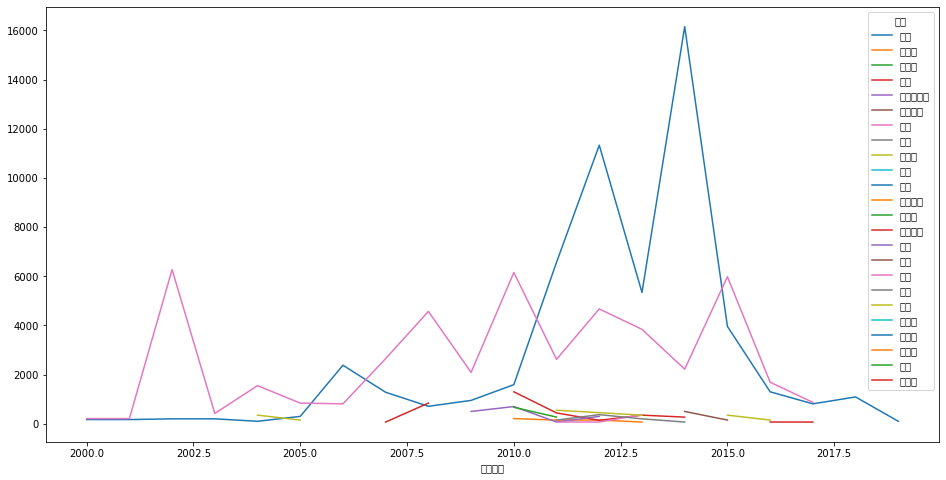

In [13]:
# C-4 plot
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Songti SC']
分进合击初阶_pivot.plot(figsize=(16,8))

![](https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot_table.svg)

#  pivot_table说明

* [什么是透视表？](https://zhuanlan.zhihu.com/p/31952948)


## pivot_table 长框变宽框
pivot_table 分解动作及作图

### pivot_table
* pivot_table 比pivot 多function运算
* 这样相当于groupby+agg+pivot 的结果可用更好的pivot_table

上面两代碼等价，pivot_table仿佛是加入了columns与margin功能的groupby函数，比groupby更加灵活。



















-----


## 以下小心使用, 不然就刪



-----


In [21]:
# D-0
df.groupby(["国家","成立年份"]).agg({"估值（亿人民币）":sum}).fillna(0)

估值（亿人民币）
国家  成立年份          
中国  2000       170
    2001       170
    2002       200
    2003       200
    2004       100
...            ...
韩国  2005        70
    2007       350
    2010       670
    2011       270
马耳他 2017       150

[100 rows x 1 columns]

In [23]:
# D-1
df.groupby(["国家","成立年份"])[["估值（亿人民币）"]].sum()

估值（亿人民币）
国家  成立年份          
中国  2000       170
    2001       170
    2002       200
    2003       200
    2004       100
...            ...
韩国  2005        70
    2007       350
    2010       670
    2011       270
马耳他 2017       150

[100 rows x 1 columns]

In [24]:
# D-2
分进合击初阶_pivot_table = 分进合击初阶.reset_index().pivot_table(index = '国家' ,columns='成立年份',values='估值（亿人民币）',aggfunc="sum")
分进合击初阶_pivot_table

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20262 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20122 missing from c

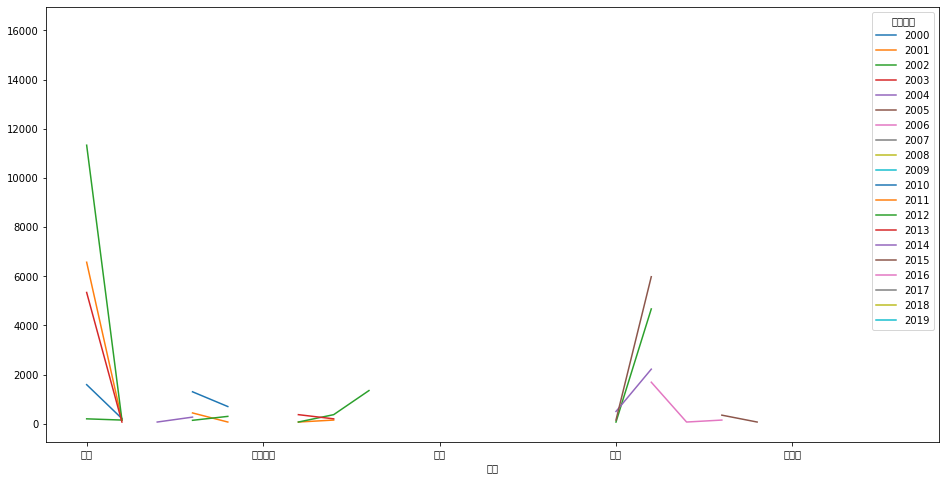

In [27]:
%matplotlib --list
# D-3
分进合击初阶_pivot_table.plot(figsize=(16,8))

# 练习：按照年份，将不同行业的估值趋势进行描述